# **1. 데이터 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 샘플 데이터 만들기
# d_ent_train = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_train.csv')
# p_ent_train = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_train.csv')
# # 기업ID 만들기
# d_ent_train = d_ent_train.reset_index()
# d_ent_train = d_ent_train.rename(columns={'index':'기업ID'})
# d_ent_train['기업ID'] = d_ent_train['기업ID'].apply(lambda x: x+1)
# d_ent_train
# # 정책ID 만들기
# p_ent_train = p_ent_train.reset_index()
# p_ent_train = p_ent_train.rename(columns={'index':'정책ID'})
# p_ent_train['정책ID'] = p_ent_train['정책ID'].apply(lambda x: x+1)
# d_ent_train_sampled = d_ent_train.sample(n=500000, replace=True)
# p_ent_train_sampled = p_ent_train.sample(n=500000, replace=True)
# d_ent_train_sampled.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_train_sampled.csv',encoding='utf-8-sig', index=False)
# p_ent_train_sampled.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_train_sampled.csv',encoding='utf-8-sig', index=False)

In [ ]:
# 불러오기
d_ent_train_sampled = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_train_sampled.csv')
p_ent_train_sampled = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_train_sampled.csv')
d_ent_final = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_final.csv')
p_ent_final = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_final.csv')

##  **1. train_rating data 만들기**

* rating_1: 업종
* rating_2: 기업규모
* rating_3: 지역
* rating_4: 업력

 **1. rating_1: 업종**

In [ ]:
# train_rating_1 = pd.DataFrame(columns={'정책ID','rating1','기업ID'}) # 업종
# train_rating_1['기업ID'] = d_ent_train_sampled['기업ID'] 
# train_rating_1['정책ID'] = p_ent_train_sampled['정책ID']
# train_rating_1['태그-업종(대분류)'] = p_ent_train_sampled['태그-업종(대분류)']
# train_rating_1['업종(대분류)'] = d_ent_train_sampled['업종(대분류)']
# train_rating_1
# for k in range(len(train_rating_1)):
#     if (train_rating_1.loc[k, '태그-업종(대분류)'] == '무관')|(train_rating_1.loc[k, '업종(대분류)'] in train_rating_1.loc[k, '태그-업종(대분류)']):
#         train_rating_1.loc[k, 'rating1'] = 1
#     else:
#         train_rating_1.loc[k, 'rating1'] = 0
# train_rating_1.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_1.csv')

 **2. rating_2: 기업규모**

In [ ]:
# train_rating_2 = pd.DataFrame(columns={'정책ID','rating2','기업ID'}) # 기업규모
# train_rating_2['기업ID'] = d_ent_train_sampled['기업ID'] 
# train_rating_2['정책ID'] = p_ent_train_sampled['정책ID']
# train_rating_2['태그-기업규모'] = p_ent_train_sampled['태그-기업규모']
# train_rating_2['기업규모'] = d_ent_train_sampled['기업규모']

# for k in range(len(train_rating_2)):
#     if (train_rating_2.loc[k, '태그-기업규모'] == '무관')|(train_rating_2.loc[k, '기업규모'] in train_rating_2.loc[k, '태그-기업규모']):
#         train_rating_2.loc[k, 'rating2'] = 1
#     else:
#         train_rating_2.loc[k, 'rating2'] = 0

# train_rating_2.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_2.csv')

**3. rating_3: 업종**

In [ ]:
# train_rating_3 = pd.DataFrame(columns={'정책ID','rating3','기업ID'}) # 지역
# train_rating_3['기업ID'] = d_ent_train_sampled['기업ID'] 
# train_rating_3['정책ID'] = p_ent_train_sampled['정책ID']
# train_rating_3['태그-지역(시도)'] = p_ent_train_sampled['태그-지역(시도)']
# train_rating_3['태그-지역(시군구)'] = p_ent_train_sampled['태그-지역(시군구)']
# train_rating_3['지역(광역시도)'] = d_ent_train_sampled['지역(광역시도)']
# train_rating_3['지역(시군구)'] = d_ent_train_sampled['지역(시군구)']

# for k in range(len(train_rating_3)):
#     if (((train_rating_3.loc[k,'지역(광역시도)'] in train_rating_3.loc[k,'태그-지역(시도)'])&(train_rating_3.loc[k,'지역(시군구)'] in train_rating_3.loc[k,'태그-지역(시군구)']))
#       |(train_rating_3.loc[k,'태그-지역(시도)']=='전국')
#       |((train_rating_3.loc[k,'지역(광역시도)'] in train_rating_3.loc[k,'태그-지역(시도)'])&(train_rating_3.loc[k,'태그-지역(시군구)'] =='전체'))):
#         train_rating_3.loc[k, 'rating3'] = 1
#     else:
#         train_rating_3.loc[k, 'rating3'] = 0

# train_rating_3.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_3.csv')

**4. rating_4: 업력**

In [ ]:
# # str있는 업력(월) 0으로 치환
# def convert_int(var):
#     try:
#         int(var)
#     except:
#         var = var.replace('측정제한','0').replace('판단불가','0',).replace('-','0').replace('중견기업','0')
#     return var
# d_ent_train_sampled['업력(월)']=d_ent_train_sampled['업력(월)'].apply(convert_int)

# train_rating_4 = pd.DataFrame(columns={'정책ID','rating4','기업ID'}) # 업력(시작)
# train_rating_4['기업ID'] = d_ent_train_sampled['기업ID'] 
# train_rating_4['정책ID'] = p_ent_train_sampled['정책ID']
# train_rating_4['태그-업력(시작)'] = p_ent_train_sampled['태그-업력(시작)']
# train_rating_4['태그-업력(종료)'] = p_ent_train_sampled['태그-업력(종료)']
# train_rating_4['업력(월)'] = d_ent_train_sampled['업력(월)'].astype(int)

# for k in range(len(train_rating_4)):
#     if (((train_rating_4.loc[k,'업력(월)'] >= train_rating_4.loc[k,'태그-업력(시작)'])&(train_rating_4.loc[k,'업력(월)'] < train_rating_4.loc[k,'태그-업력(종료)']))
#         |((train_rating_4.loc[k,'태그-업력(시작)']==0)&(train_rating_4.loc[k,'태그-업력(종료)']==0))):
#         train_rating_4.loc[k, 'rating4'] = 1
#     else:
#         train_rating_4.loc[k, 'rating4'] = 0

# train_rating_4.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_4.csv')

##  **2. test_rating data 만들기**

In [ ]:
# # 샘플 데이터 만들기
# d_ent_test = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_test.csv')
# p_ent_test = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_test.csv')
# # 기업ID 만들기
# d_ent_test = d_ent_test.reset_index()
# d_ent_test = d_ent_test.rename(columns={'index':'기업ID'})
# d_ent_test['기업ID'] = d_ent_test['기업ID'].apply(lambda x: x+2069)
# d_ent_test
# # 정책ID 만들기
# p_ent_test = p_ent_test.reset_index()
# p_ent_test = p_ent_test.rename(columns={'index':'정책ID'})
# p_ent_test['정책ID'] = p_ent_test['정책ID'].apply(lambda x: x+16937)
# d_ent_test_sampled = d_ent_test.sample(n=100000, replace=True)
# p_ent_test_sampled = p_ent_test.sample(n=100000, replace=True)
# d_ent_test_sampled.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_test_sampled.csv',encoding='utf-8-sig', index=False)
# p_ent_test_sampled.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_test_sampled.csv',encoding='utf-8-sig', index=False)

In [ ]:
# # 불러오기
# d_ent_test_sampled = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/기업 데이터 최종/d_ent_test_sampled.csv')
# p_ent_test_sampled = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/p_ent_test_sampled.csv')

* rating_1: 업종
* rating_2: 기업규모
* rating_3: 지역
* rating_4: 업력

 **1. rating_1: 업종**

In [ ]:
# test_rating_1 = pd.DataFrame(columns={'정책ID','rating1','기업ID'}) # 업종
# test_rating_1['기업ID'] = d_ent_test_sampled['기업ID'] 
# test_rating_1['정책ID'] = p_ent_test_sampled['정책ID']
# test_rating_1['태그-업종(대분류)'] = p_ent_test_sampled['태그-업종(대분류)']
# test_rating_1['업종(대분류)'] = d_ent_test_sampled['업종(대분류)']
# test_rating_1
# for k in range(len(test_rating_1)):
#     if (test_rating_1.loc[k, '태그-업종(대분류)'] == '무관')|(test_rating_1.loc[k, '업종(대분류)'] in test_rating_1.loc[k, '태그-업종(대분류)']):
#         test_rating_1.loc[k, 'rating1'] = 1
#     else:
#         test_rating_1.loc[k, 'rating1'] = 0
# test_rating_1.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_1.csv')

 **2. rating_2: 기업규모**

In [ ]:
# test_rating_2 = pd.DataFrame(columns={'정책ID','rating2','기업ID'}) # 기업규모
# test_rating_2['기업ID'] = d_ent_test_sampled['기업ID'] 
# test_rating_2['정책ID'] = p_ent_test_sampled['정책ID']
# test_rating_2['태그-기업규모'] = p_ent_test_sampled['태그-기업규모']
# test_rating_2['기업규모'] = d_ent_test_sampled['기업규모']

# for k in range(len(test_rating_2)):
#     if (test_rating_2.loc[k, '태그-기업규모'] == '무관')|(test_rating_2.loc[k, '기업규모'] in test_rating_2.loc[k, '태그-기업규모']):
#         test_rating_2.loc[k, 'rating2'] = 1
#     else:
#         test_rating_2.loc[k, 'rating2'] = 0

# test_rating_2.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_2.csv')

**3. rating_3: 업종**

In [ ]:
# test_rating_3 = pd.DataFrame(columns={'정책ID','rating3','기업ID'}) # 지역
# test_rating_3['기업ID'] = d_ent_test_sampled['기업ID'] 
# test_rating_3['정책ID'] = p_ent_test_sampled['정책ID']
# test_rating_3['태그-지역(시도)'] = p_ent_test_sampled['태그-지역(시도)']
# test_rating_3['태그-지역(시군구)'] = p_ent_test_sampled['태그-지역(시군구)']
# test_rating_3['지역(광역시도)'] = d_ent_test_sampled['지역(광역시도)']
# test_rating_3['지역(시군구)'] = d_ent_test_sampled['지역(시군구)']

# for k in range(len(test_rating_3)):
#     if (((test_rating_3.loc[k,'지역(광역시도)'] in test_rating_3.loc[k,'태그-지역(시도)'])&(test_rating_3.loc[k,'지역(시군구)'] in test_rating_3.loc[k,'태그-지역(시군구)']))
#       |(test_rating_3.loc[k,'태그-지역(시도)']=='전국')
#       |((test_rating_3.loc[k,'지역(광역시도)'] in test_rating_3.loc[k,'태그-지역(시도)'])&(test_rating_3.loc[k,'태그-지역(시군구)'] =='전체'))):
#         test_rating_3.loc[k, 'rating3'] = 1
#     else:
#         test_rating_3.loc[k, 'rating3'] = 0

# test_rating_3.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_3.csv')

**4. rating_4: 업력**

In [ ]:
# # str있는 업력(월) 0으로 치환
# def convert_int(var):
#     try:
#         int(var)
#     except:
#         var = var.replace('측정제한','0').replace('판단불가','0',).replace('-','0').replace('중견기업','0')
#     return var
# d_ent_test_sampled['업력(월)']=d_ent_test_sampled['업력(월)'].apply(convert_int)

# test_rating_4 = pd.DataFrame(columns={'정책ID','rating4','기업ID'}) # 업력(시작)
# test_rating_4['기업ID'] = d_ent_test_sampled['기업ID'] 
# test_rating_4['정책ID'] = p_ent_test_sampled['정책ID']
# test_rating_4['태그-업력(시작)'] = p_ent_test_sampled['태그-업력(시작)']
# test_rating_4['태그-업력(종료)'] = p_ent_test_sampled['태그-업력(종료)']
# test_rating_4['업력(월)'] = d_ent_test_sampled['업력(월)'].astype(int)

# for k in range(len(test_rating_4)):
#     if (((test_rating_4.loc[k,'업력(월)'] >= test_rating_4.loc[k,'태그-업력(시작)'])&(test_rating_4.loc[k,'업력(월)'] < test_rating_4.loc[k,'태그-업력(종료)']))
#         |((test_rating_4.loc[k,'태그-업력(시작)']==0)&(test_rating_4.loc[k,'태그-업력(종료)']==0))):
#         test_rating_4.loc[k, 'rating4'] = 1
#     else:
#         test_rating_4.loc[k, 'rating4'] = 0

# test_rating_4.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_4.csv')

## **2. train_rating_data 불러오기**

In [ ]:
train_rating_1 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_1.csv').iloc[:,1:][['정책ID','기업ID','rating1']]
train_rating_2 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_2.csv').iloc[:,1:][['정책ID','기업ID','rating2']]
train_rating_3 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_3.csv').iloc[:,1:][['정책ID','기업ID','rating3']]
train_rating_4 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/트레인 데이터/rating_4.csv').iloc[:,1:][['정책ID','기업ID','rating4']]

## **3. test_rating_data 불러오기**

In [ ]:
test_rating_1 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_1.csv').iloc[:,1:][['정책ID','기업ID','rating1']]
test_rating_2 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_2.csv').iloc[:,1:][['정책ID','기업ID','rating2']]
test_rating_3 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_3.csv').iloc[:,1:][['정책ID','기업ID','rating3']]
test_rating_4 = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/테스트 데이터/rating_4.csv').iloc[:,1:][['정책ID','기업ID','rating4']]

## **4. train & test concat**

In [ ]:
concat_rating_1 = pd.concat([train_rating_1,test_rating_1]).reset_index(drop=True)
concat_rating_2 = pd.concat([train_rating_2,test_rating_2]).reset_index(drop=True)
concat_rating_3 = pd.concat([train_rating_3,test_rating_3]).reset_index(drop=True)
concat_rating_4 = pd.concat([train_rating_4,test_rating_4]).reset_index(drop=True)

# from sklearn.model_selection import train_test_split
# concat rating 합친 데이터 만들기 
# concat_train_rating_1,concat_test_rating_1 = train_test_split(concat_rating_1,test_size=0.2,random_state=1)
# concat_train_rating_2,concat_test_rating_2 = train_test_split(concat_rating_2,test_size=0.2,random_state=1)
# concat_train_rating_3,concat_test_rating_3 = train_test_split(concat_rating_3,test_size=0.2,random_state=1)
# concat_train_rating_4,concat_test_rating_4 = train_test_split(concat_rating_4,test_size=0.2,random_state=1)
# concat_rating = pd.concat([concat_rating_1[['rating1']],concat_rating_2[['rating2']],concat_rating_3[['rating3']],concat_rating_4],axis=1)[['정책ID','기업ID','rating1','rating2','rating3']]
# rating sum하기
# concat_rating['rating']=concat_rating['rating1']+concat_rating['rating2']+concat_rating['rating3']
# concat_rating = concat_rating.drop(['rating1','rating2','rating3'],axis=1)
# 합친 데이터 트레인 테스트 분리
# concat_train_rating,concat_test_rating = train_test_split(concat_rating,test_size=0.2,random_state=1)

In [ ]:
concat_rating = pd.concat([concat_rating_1[['rating1']],concat_rating_2[['rating2']],concat_rating_3[['rating3']],concat_rating_4],axis=1)[['정책ID','기업ID','rating1','rating2','rating3']]


In [ ]:
concat_rating.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/concat_rating.csv',encoding='utf-8-sig',index=False)

In [ ]:
concat_rating

,정책ID,기업ID,rating1,rating2,rating3
0,10988,1717,0,1,0
1,9125,1763,1,1,0
2,16428,1023,0,0,0
3,163,696,0,0,1
4,7952,1987,0,0,0
...,...,...,...,...,...
599995,17899,2348,1,0,0
599996,17424,2350,0,1,0
599997,16986,2153,0,0,0
599998,17759,2431,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
concat_rating['rating']=concat_rating['rating1']+concat_rating['rating2']
concat_rating = concat_rating.drop(['rating1','rating2','rating3'],axis=1)
# 합친 데이터 트레인 테스트 분리
concat_train_rating,concat_test_rating = train_test_split(concat_rating,test_size=0.2,random_state=1)

In [ ]:
# rating1+rating2 업종과 규모가 해당하면 1
concat_train_rating['rating']=np.where(concat_train_rating['rating']==2,1,0)
concat_test_rating['rating']=np.where(concat_test_rating['rating']==2,1,0)

In [ ]:
concat_test_rating['rating']=np.where(concat_test_rating['rating']==2,1,0)

In [ ]:
concat_train_rating['rating'].unique()

array([0, 1])

In [ ]:
# 위에 해당하는 케이스 오만개 데이터
concat_train_rating[concat_train_rating['rating']==1]

,정책ID,기업ID,rating
535199,17869,2403,1
593672,17179,2138,1
482747,9843,642,1
174374,14757,860,1
18296,13148,833,1
...,...,...,...
205895,7425,945,1
513300,17316,2218,1
167302,14763,1193,1
229520,9255,1763,1


# **2. 모델링**

In [ ]:
n_enterprises = len(concat_rating.기업ID.unique())
n_policys = len(concat_rating.정책ID.unique())
print(n_enterprises)
print(n_policys)

2585
17939


<a id="2"></a> 
## **1. Creating dot product model**

In [ ]:
# creating policy embedding path
policy_input = Input(shape=[1], name="Policy-Input")
policy_embedding = Embedding(n_policys+1, 10, name="Policy-Embedding")(policy_input)
policy_vec = Flatten(name="Flatten-Policy")(policy_embedding)

# creating enterprise embedding path
enterprise_input = Input(shape=[1], name="Enterprise-Input")
enterprise_embedding = Embedding(n_enterprises+1, 10, name="Enterprise-Embedding")(enterprise_input)
enterprise_vec = Flatten(name="Flatten-Enterprise")(enterprise_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([policy_vec, enterprise_vec])
model = Model([enterprise_input, policy_input], prod)
model.compile('adam', 'binary_crossentropy')

Epoch 1/5
15000/15000 [==============================] - 43s 3ms/step - loss: 1.0782
Epoch 2/5
15000/15000 [==============================] - 43s 3ms/step - loss: 0.7347
Epoch 3/5
15000/15000 [==============================] - 42s 3ms/step - loss: 0.4793
Epoch 4/5
15000/15000 [==============================] - 43s 3ms/step - loss: 0.3062
Epoch 5/5
15000/15000 [==============================] - 43s 3ms/step - loss: 0.2366


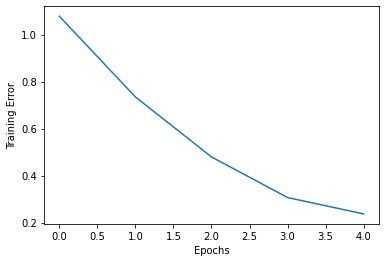

In [ ]:
from keras.models import load_model

if os.path.exists('model1.h5'):
    model = load_model('model1.h5')
else:
    history = model.fit([concat_train_rating.기업ID, concat_train_rating.정책ID], concat_train_rating.rating, epochs=5, verbose=1)
    model.save('model1.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model.evaluate([concat_test_rating.기업ID, concat_test_rating.정책ID], concat_test_rating.rating)

3750/3750 [==============================] - 4s 954us/step - loss: 0.7024


0.7023764848709106

In [ ]:
predictions = model.predict([concat_test_rating.기업ID.head(10), concat_test_rating.정책ID.head(10)])

[print(predictions[i], concat_test_rating.rating.iloc[i]) for i in range(0,10)]

[0.03374401] 0
[-0.09709002] 0
[-0.09316045] 0
[0.07089071] 0
[0.1341183] 0
[-0.23350766] 0
[-0.49058014] 0
[-0.27291957] 0
[-0.14835887] 0
[0.10869908] 0


[None, None, None, None, None, None, None, None, None, None]

<a id="3"></a> 
## **2. Creating Neural Network**

In [ ]:
from keras.layers import Concatenate

# creating book embedding path
policy_input = Input(shape=[1], name="Policy-Input")
policy_embedding = Embedding(n_policys+1, 10, name="Policy-Embedding")(policy_input)
policy_vec = Flatten(name="Flatten-Policy")(policy_embedding)

# creating user embedding path
enterprise_input = Input(shape=[1], name="Enterprise-Input")
enterprise_embedding = Embedding(n_enterprises+1, 10, name="Enterprise-Embedding")(enterprise_input)
enterprise_vec = Flatten(name="Flatten-Enterprise")(enterprise_embedding)

# concatenate features
conc = Concatenate()([policy_vec, enterprise_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1,activation='sigmoid')(fc2)

# Create model and compile it
model2 = Model([enterprise_input, policy_input], out)
model2.compile('adam', 'binary_crossentropy')

Epoch 1/5
15000/15000 [==============================] - 47s 3ms/step - loss: 0.1443
Epoch 2/5
15000/15000 [==============================] - 46s 3ms/step - loss: 0.0776
Epoch 3/5
15000/15000 [==============================] - 46s 3ms/step - loss: 0.0515
Epoch 4/5
15000/15000 [==============================] - 46s 3ms/step - loss: 0.0353
Epoch 5/5
15000/15000 [==============================] - 46s 3ms/step - loss: 0.0249


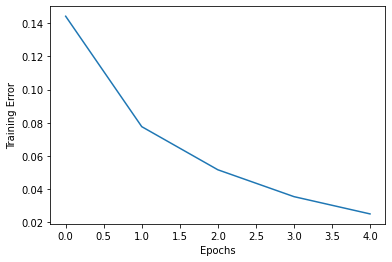

In [ ]:
from keras.models import load_model

if os.path.exists('model2.h5'):
    model2 = load_model('model2.h5')
else:
    history = model2.fit([concat_train_rating.기업ID, concat_train_rating.정책ID], concat_train_rating.rating, epochs=5, verbose=1)
    model2.save('model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model2.evaluate([concat_test_rating.기업ID, concat_test_rating.정책ID], concat_test_rating.rating)

3750/3750 [==============================] - 4s 1ms/step - loss: 2.6270


2.6270172595977783

In [ ]:
predictions = model2.predict([concat_test_rating.기업ID.head(10), concat_test_rating.정책ID.head(10)])

[print(predictions[i], concat_test_rating.rating.iloc[i]) for i in range(0,10)]

[5.3131373e-07] 0
[3.074894e-05] 0
[6.917067e-05] 0
[1.5577268e-06] 0
[4.2353398e-07] 0
[0.09083477] 0
[1.080588e-07] 0
[4.825512e-07] 0
[2.0553809e-05] 0
[0.00331351] 0


[None, None, None, None, None, None, None, None, None, None]

<a id="4"></a> 
## **3. Visualizing Embeddings**

In [ ]:
# Extract embeddings
policy_em = model.get_layer('Policy-Embedding')
policy_em_weights = policy_em.get_weights()[0]

In [ ]:
policy_em_weights[:5]

array([[ 0.04194402, -0.04966484,  0.03017875, -0.00883926,  0.0123889 ,
         0.0026976 ,  0.0168169 ,  0.03440783, -0.04422507, -0.0196473 ],
       [ 0.20460354, -0.14767407, -0.26302978, -0.2158476 , -0.10656752,
         0.20414403,  0.21939898, -0.14756711,  0.22729683,  0.1020487 ],
       [ 0.07380407, -0.0288761 , -0.02965935, -0.1586878 , -0.07031748,
        -0.06509861, -0.02563553,  0.00728934,  0.0085505 , -0.06411812],
       [-0.3818023 ,  0.0716898 ,  0.03756724,  0.08580445, -0.4644491 ,
        -0.43138614, -0.17397316, -0.18350647,  0.2870016 , -0.50391287],
       [-0.00630626,  0.03679007, -0.0364489 , -0.1782578 , -0.03743988,
        -0.02650809, -0.03121344, -0.01568051, -0.0607304 , -0.11142172]],
      dtype=float32)

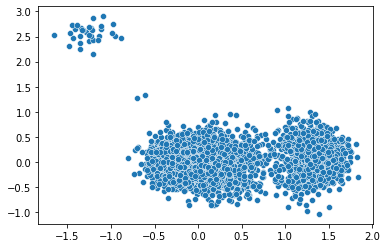

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(policy_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
policy_em_weights = policy_em_weights / np.linalg.norm(policy_em_weights, axis = 1).reshape((-1, 1))
policy_em_weights[0][:10]
np.sum(np.square(policy_em_weights[0]))

1.0000001

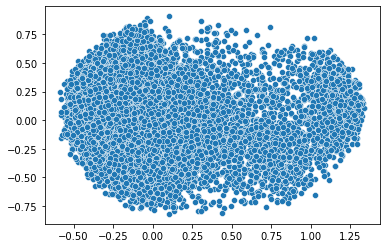

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(policy_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(policy_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 17940 samples in 0.025s...
[t-SNE] Computed neighbors for 17940 samples in 5.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17940
[t-SNE] Computed conditional probabilities for sample 2000 / 17940
[t-SNE] Computed conditional probabilities for sample 3000 / 17940
[t-SNE] Computed conditional probabilities for sample 4000 / 17940
[t-SNE] Computed conditional probabilities for sample 5000 / 17940
[t-SNE] Computed conditional probabilities for sample 6000 / 17940
[t-SNE] Computed conditional probabilities for sample 7000 / 17940
[t-SNE] Computed conditional probabilities for sample 8000 / 17940
[t-SNE] Computed conditional probabilities for sample 9000 / 17940
[t-SNE] Computed conditional probabilities for sample 10000 / 17940
[t-SNE] Computed conditional probabilities for sample 11000 / 17940
[t-SNE] Computed conditional probabilities for sample 12000 / 17940
[t-SNE] Computed conditional probabilities for sa

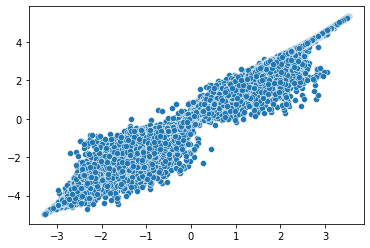

In [ ]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

<a id="5"></a> 
## **4. Making Recommendations**

### **- 원리** ###

In [ ]:
# 원하는 기업 숫자로 바꾸기
n_d_ent = 2

In [ ]:
# Creating concat_rating for making recommendations for the first user
policy_data = np.array(list(set(concat_rating.정책ID)))
enterprise = np.array([n_d_ent for i in range(len(policy_data))])
predictions = model.predict([enterprise, policy_data])
predictions = np.array([a[0] for a in predictions])
recommended_policy_ids = (-predictions).argsort()

show_d_ent = d_ent_final.loc[n_d_ent-1]
print(show_d_ent)

기업ID               2
기업체명         (주)명현유통
업력(월)            244
기업규모             중기업
업종(대분류)     도매 및 소매업
지역(광역시도)         경기도
지역(시군구)          이천시
Name: 1, dtype: object


In [ ]:
new = pd.DataFrame(columns=p_ent_final.columns)
for i in recommended_policy_ids:
    new = new.append(p_ent_final[p_ent_final['정책ID']==i])

abc = new[new['태그-업종(대분류)'].apply(lambda x: show_d_ent['업종(대분류)'] in x)]
abc = abc[abc['태그-지역(시도)'].apply(lambda x: (x=='전국')|(show_d_ent['지역(광역시도)'] in x))]
abc

,정책ID,정책서비스ID,서비스명,태그-신청절차,태그-지원유형,태그-지역(시도),태그-지역(시군구),태그-기업규모,태그-업종(대분류),태그-업력(시작),태그-업력(종료)
295,296,SD0000020007,양식어업재해보험 보험료 지원,오프라인,"현금,현물",전국,전체,무관,"농업, 임업 및 어업/도매 및 소매업",0.0,0.0
16621,16622,B55139800011,일반용 전기설비 사용전점검,복합,"민원,상담,법률/교육,용역",전국,전체,무관,"농업, 임업 및 어업/전기, 가스, 증기 및 공기 조절 공급업/수도, 하수 및 폐기...",0.0,0.0
16562,16563,PTR000051710,무료 법률구조,오프라인,"정보제공/민원,상담,법률",전국,전체,중소기업/소상공인,"농업, 임업 및 어업/도매 및 소매업/공공 행정, 국방 및 사회보장 행정/교육 서비...",0.0,0.0
15595,15596,154300000374,화훼종합유통센터 건립지원,오프라인,기타,전국,전체,중소기업/소상공인,도매 및 소매업,0.0,0.0
2678,2679,417000000258,FTA 피해 보전 직불금 지원,오프라인,"현금,현물",경기도,양평군,무관,"농업, 임업 및 어업/도매 및 소매업",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17185,17186,BIZC00070690,2021년 한국 우수 금형 및 관련기업 전시관 참여 안내 공고,복합,"정보제공/교육,용역",전국,전체,무관,"도매 및 소매업/전문, 과학 및 기술 서비스업/교육 서비스업",0.0,0.0
17406,17407,BIZC00070448,[경기] 부천시 2021년 비대면 동남아(싱가폴) 판로확장 지원사업 공고,복합,기타,경기도,부천시,중소기업,제조업/도매 및 소매업,0.0,0.0
17245,17246,BIZC00070623,2021년 소상공인 온라인 판로 지원사업 안내 공고(라이브커머스 제작ㆍ운영지원),복합,기타,전국,전체,중소기업/소상공인,도매 및 소매업/정보통신업,0.0,0.0
17286,17287,BIZC00070575,2021년 2차 디지털커머스 전문기관 소상공인 온라인 판매기획전 모집 공고,복합,"복지/교육,용역",전국,전체,소상공인,"농업, 임업 및 어업/제조업/도매 및 소매업/사업시설 관리, 사업 지원 및 임대 서...",0.0,0.0


In [ ]:
'현금,현물/정보제공'.split('/')

['현금,현물', '정보제공']

In [ ]:
try1 = TAGGING(d_ent_final,p_ent_final,concat_rating,'제조업','중소기업','경기도','이천시','현금,현물')

In [ ]:
try1.SHOW_POLICY()

,정책ID,정책서비스ID,서비스명,태그-신청절차,태그-지원유형,태그-지역(시도),태그-지역(시군구),태그-기업규모,태그-업종(대분류),태그-업력(시작),태그-업력(종료)
2949,2950,407000000485,고품질쌀유통활성화사업,오프라인,"현금,현물",경기도,이천시,무관,"농업, 임업 및 어업/제조업/건설업/전문, 과학 및 기술 서비스업",0.0,0.0
2815,2816,407000000370,식품소재 및 반가공산업 육성 지원,오프라인,"현금,현물",경기도,이천시,중소기업/소상공인,"농업, 임업 및 어업/제조업/전문, 과학 및 기술 서비스업",0.0,0.0
2784,2785,407000000337,들녘경영체 육성 지원,온라인,"현금,현물",경기도,이천시,무관,"농업, 임업 및 어업/제조업/교육 서비스업",0.0,0.0
3273,3274,407000000277,농촌융복합산업 자금 융자 지원,오프라인,"현금,현물",경기도,이천시,무관,"농업, 임업 및 어업/제조업/도매 및 소매업/전문, 과학 및 기술 서비스업",0.0,0.0
2394,2395,611000009283,농업자금 이차보전지원(귀농귀촌 정착지원),오프라인,"현금,현물",경기도,이천시,무관,"농업, 임업 및 어업/제조업/건설업/교육 서비스업",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3213,3214,409000000034,로컬푸드 연중생산체계 구축 지원,오프라인,"현금,현물",경기도,김포시,무관,"농업, 임업 및 어업/제조업",0.0,0.0
2318,2319,641000000003,식품위생업소 시설개선자금 및 모범음식점 운영자금 융자 지원,오프라인,"현금,현물",경기도,전체,중소기업/소상공인,제조업/숙박 및 음식점업,0.0,0.0
17610,17611,BIZC00070235,2022년 로봇활용 제조혁신 지원사업 수요조사 공고,복합,"현금,현물/정보제공",전국,전체,중소기업/중견기업,"제조업/운수 및 창고업/전문, 과학 및 기술 서비스업",0.0,0.0
108,109,149200000029,광업 종사 근로자 건강진단 지원,오프라인,"현금,현물/복지",전국,전체,무관,광업/제조업/보건업 및 사회복지 서비스업,0.0,0.0


### **- 매칭 클래스 생성**

In [ ]:
class MATCHING():
    def __init__(self,d_ent_final,p_ent_final,concat_rating, model, sector,scale,area_sido,area_sigungu,support):
        self.d_ent_final = d_ent_final
        self.p_ent_final = p_ent_final
        self.concat_rating = concat_rating
        self.sector = sector
        self.scale = scale
        self.area_sido = area_sido
        self.area_sigungu = area_sigungu
        self.support = support
        self.model = model
        
    def RECOMMENDATION(self):

        d_ent_final=self.d_ent_final
        p_ent_final=self.p_ent_final
        concat_rating=self.concat_rating
        sector = self.sector
        scale = self.scale
        area_sido = self.area_sido
        area_sigungu = self.area_sigungu
        support = self.support
        model = self.model
        try:
            dataframe = d_ent_final[(d_ent_final['업종(대분류)']==sector)&(d_ent_final['기업규모']==scale)].reset_index(drop=True)
            # 업종과 기업규모가 해당하는 케이스가 없을 때
            if len(dataframe)==0:
                # 업종과 기업규모 모두 결측값(해당없음)일 때
                if (sector == '해당없음')&(scale == '해당없음'):
                    abc = p_ent_final[p_ent_final['태그-업종(대분류)'].apply(lambda x: x=='무관')]
                    abc = abc[abc['태그-기업규모'].apply(lambda x: x=='무관')]

                    # 지역(시도)도 결측값(해당없음)일 때
                    if area_sido == '해당없음':
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: x=='전국')]
                        # 지역(시군구)가 결측값일 때
                        if area_sigungu == '해당없음':
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                        # 지역(시군구)가 결측값이 아닐 때
                        else:
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: (area_sigungu in x)|(x=='전체'))]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                    # 지역(시도)는 결측값이 아닐 때
                    else:
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: (area_sido in x)|(x=='전국'))]
                        # 지역(시군구)가 결측값일 때
                        if area_sigungu == '해당없음':
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                        # 지역(시군구)가 결측값이 아닐 때
                        else:
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: (area_sigungu in x)|(x=='전체'))]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                # 업종 값이 있고 기업규모는 결측값일 때        
                elif (sector != '해당없음')&(scale == '해당없음'):
                    abc = p_ent_final[p_ent_final['태그-업종(대분류)'].apply(lambda x: sector in x)]
                    abc = abc[abc['태그-기업규모'].apply(lambda x: x=='무관')]
                    # 지역(시도)도 결측값(해당없음)일 때
                    if area_sido == '해당없음':
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: x=='전국')]
                        abc = abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                        
                        abc['태그-업종(대분류)스플릿'] = abc['태그-업종(대분류)'].apply(lambda x: x.split('/'))
                        a0 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==1))]
                        a1 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==2))]
                        a2 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==3))]
                        a3 = abc[abc['태그-업종(대분류)'].apply(lambda x: sector in x)]
                        new = pd.concat([a0,a1,a2,a3]).reset_index(drop=True)
                        return new.drop_duplicates(['서비스명'],keep='first')
                    # 지역(시도)는 결측값이 아닐 때
                    else:
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: (area_sido in x)|(x=='전국'))]
                        # 지역(시군구)가 결측값일 때
                        if area_sigungu == '해당없음':
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                            abc = abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                            abc['태그-업종(대분류)스플릿'] = abc['태그-업종(대분류)'].apply(lambda x: x.split('/'))
                            a0 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==1))]
                            a1 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==2))]
                            a2 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==3))]
                            a3 = abc[abc['태그-업종(대분류)'].apply(lambda x: sector in x)]
                            new = pd.concat([a0,a1,a2,a3]).reset_index(drop=True)
                            return new.drop_duplicates(['서비스명'],keep='first')
                        # 지역(시군구)가 결측값이 아닐 때
                        else:
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: (area_sigungu in x)|(x=='전체'))]
                            abc = abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                            abc['태그-업종(대분류)스플릿'] = abc['태그-업종(대분류)'].apply(lambda x: x.split('/'))
                            a0 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==1))]
                            a1 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==2))]
                            a2 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==3))]
                            a3 = abc[abc['태그-업종(대분류)'].apply(lambda x: sector in x)]
                            new = pd.concat([a0,a1,a2,a3]).reset_index(drop=True)
                            return new.drop_duplicates(['서비스명'],keep='first')
                # 업종이 결측값이고 기업규모는 값이 있을 때
                elif (sector == '해당없음')&(scale != '해당없음'):
                    abc = p_ent_final[p_ent_final['태그-업종(대분류)'].apply(lambda x: x=='무관')]
                    abc = abc[abc['태그-기업규모'].apply(lambda x: scale in x)]
                    # 지역(시도)도 결측값(해당없음)일 때
                    if area_sido == '해당없음':
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: x=='전국')]
                        return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                    # 지역(시도)는 결측값이 아닐 때
                    else:
                        abc = abc[abc['태그-지역(시도)'].apply(lambda x: (area_sido in x)|(x=='전국'))]
                        # 지역(시군구)가 결측값일 때
                        if area_sigungu == '해당없음':
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                        # 지역(시군구)가 결측값이 아닐 때
                        else:
                            abc = abc[abc['태그-지역(시군구)'].apply(lambda x: (area_sigungu in x)|(x=='전체'))]
                            return abc[abc['태그-지원유형'].apply(lambda x: support in x)]
            # 업종과 기업규모가 있을 때
            else:
                # 지역(시도)값이 있을 때
                if len(dataframe[dataframe['지역(광역시도)']==area_sido])>=1:
                    dataframe = dataframe[dataframe['지역(광역시도)']==area_sido].reset_index(drop=True)
                    show_d_ent = dataframe.loc[0]
                    
                    # 업종,기업규모,지역(시도)가 같은 기업의 모델링을 통한 관련 정책 추천
                    policy_data = np.array(list(set(concat_rating.정책ID)))
                    enterprise = np.array([show_d_ent['기업ID'] for i in range(len(policy_data))])
                    predictions = model.predict([enterprise, policy_data])
                    predictions = np.array([a[0] for a in predictions])
                    recommended_policy_ids = (-predictions).argsort()

                    # 업종, 지역, 지원유형에 해당하는 데이터 프레임 뽑기
                    abc = p_ent_final[p_ent_final['태그-업종(대분류)'].apply(lambda x: sector in x)]
                    abc = abc[abc['태그-지역(시도)'].apply(lambda x: (x=='전국')|(area_sido in x))]
                    abc = abc[abc['태그-지원유형'].apply(lambda x: support in x)]

                    # 위 프레임에 관련 정책 순서대로 뽑기
                    new = pd.DataFrame(columns=p_ent_final.columns)
                    for i in recommended_policy_ids:
                        new = new.append(abc[abc['정책ID']==i])

                    # 지역(시군구) 값이 있을 때 
                    if len(new[new['태그-지역(시군구)']==area_sigungu])>=1:

                        a0 = new[new['태그-업종(대분류)'].apply(lambda x: x==sector)]
                        a1 = new[new['태그-지역(시군구)'].apply(lambda x: area_sigungu in x)]
                        a2 = new[new['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                        new = pd.concat([a0,a1,a2]).reset_index(drop=True)
                        return new.drop_duplicates(['서비스명'],keep='first')
                    # 지역(시군구) 값이 없을 때    
                    else:
                        a0 = new[new['태그-업종(대분류)'].apply(lambda x: x==sector)]
                        a1 = new[new['태그-업종(대분류)'].apply(lambda x: (sector in x)&(x!=sector))]
                        a2 = new[new['태그-지역(시군구)'].apply(lambda x: x=='전체')]
                        new = pd.concat([a0,a1,a2]).reset_index(drop=True)                   
                        return new.drop_duplicates(['서비스명'],keep='first')

                # 지역(시도)가 없을 때
                else:
                    abc = p_ent_final[p_ent_final['태그-기업규모'].apply(lambda x: (scale in x)|(x=='무관'))] 
                    abc = abc[abc['태그-지원유형'].apply(lambda x: support in x)]
                    abc = abc[abc['태그-지역(시도)'].apply(lambda x: (x=='전국')|(area_sido in x))]
                    abc['태그-업종(대분류)스플릿'] = abc['태그-업종(대분류)'].apply(lambda x: x.split('/'))
                    a0 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==1))]
                    a1 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==2))]
                    a2 =  abc[(abc['태그-업종(대분류)'].apply(lambda x: sector in x))&(abc['태그-업종(대분류)스플릿'].apply(lambda x: len(x)==3))]
                    a3 = abc[abc['태그-업종(대분류)'].apply(lambda x: sector in x)]
                    new = pd.concat([a0,a1,a2,a3]).reset_index(drop=True)
                    return new.drop_duplicates(['서비스명'],keep='first')
        except:
            print('해당 정책이 없습니다.')

In [ ]:
try0 = MATCHING(d_ent_final,p_ent_final,concat_rating,model,'공공 행정, 국방 및 사회보장 행정','판단제외','강원도','원주시','현금,현물')

In [ ]:
result = try0.RECOMMENDATION()
result

,정책ID,정책서비스ID,서비스명,태그-신청절차,태그-지원유형,태그-지역(시도),태그-지역(시군구),태그-기업규모,태그-업종(대분류),태그-업력(시작),태그-업력(종료)
0,1547,611000006469,"주민지원사업으로 설치되는 공용, 공공시설에 대한 각종 부담금 면제",오프라인,"현금,현물",강원도,평창군,중소기업/소상공인,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
1,17578,BIZC00070274,2021년 3분기 소상공인 손실보상 시행 공고,복합,"현금,현물/민원,상담,법률",전국,전체,중소기업/소상공인,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
2,228,PTR000051535,중소기업 법률 지원 신청,복합,"현금,현물/민원,상담,법률",전국,전체,중소기업,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
3,275,SD0000010880,중소기업 수출 인큐베이터 입주 지원,복합,"현금,현물/민원,상담,법률",전국,전체,중소기업,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
4,15809,PTR000051784,지식 재산권 보호,복합,"현금,현물/정보제공/민원,상담,법률",전국,전체,중소기업/소상공인,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
5,16544,B55062400006,산업단지 환경조성사업,오프라인,"현금,현물",전국,전체,무관,"공공 행정, 국방 및 사회보장 행정",0.0,0.0
6,314,611000003345,대체초지조성비 감면,오프라인,"현금,현물",강원도,원주시,중소기업/소상공인,"농업, 임업 및 어업/수도, 하수 및 폐기물 처리, 원료 재생업/건설업/전문, 과학...",0.0,0.0
7,1411,419000000589,친환경 농업인 유기농업 자재 등 지원,오프라인,"현금,현물",강원도,원주시,중소기업/소상공인,"농업, 임업 및 어업/공공 행정, 국방 및 사회보장 행정",0.0,0.0
8,15836,PTR000052019,지역 노사민정 협력 활성화 지원 사업,오프라인,"현금,현물",전국,전체,무관,"전문, 과학 및 기술 서비스업/공공 행정, 국방 및 사회보장 행정/교육 서비스업",0.0,0.0
9,124,149200000078,노사관계전문가 육성 지원,오프라인,"현금,현물",전국,전체,무관,"사업시설 관리, 사업 지원 및 임대 서비스업/공공 행정, 국방 및 사회보장 행정/교...",0.0,0.0


### **- 기업과 무관한 정책 제거**

In [ ]:
# 복지&(법인 not)(시설 not) 일자리 인재 근로자&공공근로 청소년 연수 유학 햇살론 납세자 등산 차상위 노인 아동 아이 센터x 어린이 &어린이집x 자녀 피해자 주택 지도자 폭력 경로당 학교 마을 통행료 재활 및 치료 수술 금연 (시민 도민 구민 군민 서민 국민) 클럽 연금 훈련 도로명 난방
# 암 약자 치유 인구 저소득 졸업 학위 양성 셔틀버스 민간인 캠핑 집수리 PC 인턴&장려금Not지원금not 숲 대사증후군 생활비 조림 동호회 유기 동물 직장맘
# 산부 시험 고용조사 통계조사원? 채용정보 건강검진
# '견학', '주택보증', '어린이집정보공시', '인력채용' & '채용정보' & '인재육성, '경제동향', '공무원', '해양소년단'
ab0 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('군인' in x)|('취업' in x))]
ab1 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('구직' in x))]
ab2 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('보육' in x)&('기업' not in x))]
ab3 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('취업' in x)&('기업' not in x))]
ab4 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('주민' in x)&('산업' not in x)&('소상공인' not in x))]
ab5 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('고졸' in x)|('장학' in x))]
ab6 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('보육' in x)&('기업' not in x))]
ab7 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('여성' in x)&('기업' not in x)&('기업' not in x))]
ab8 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ('장애' in x)&('기업' not in x))]
ab9 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ((('기숙사' in x)|('체험' in x))&('산업' not in x)))]
ab10 = p_ent_final[p_ent_final['서비스명'].apply(lambda x: ((('학교' in x)|('대학' in x))&('업' not in x)))]
ab11 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('복지' in x)&('근로복지공단' not in x)&('농가' not in x)&('사업' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab12 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('일자리' in x)&('지원' not in x)&('사업' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab13 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('인재' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab14 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('근로자' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab15 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('공공근로' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab16 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('청소년' in x)|('연수' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab17 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('햇살론' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab18 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('납세자' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab19 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('등산' in x)|('숲' in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab20 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('아동' in x)&('센터' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab21 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('아이' in x)&('아이디어' not in x)&('아이템' not in x)&('센터' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab22 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('어린이' in x)&('어린이집' not in x)&('센터' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab23 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('자녀' in x)&('센터' not in x)&('기업' not in x)&('법인' not in x)&('시설' not in x))]
ab24 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('피해자' in x)&('기업' not in x)&('법인' not in x))]
ab25 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('주택' in x)&('창업' not in x)&('기업' not in x)&('법인' not in x))]
ab26 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('지도자' in x))]
ab27 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('폭력' in x)&('기업' not in x)&('법인' not in x))]
ab28 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('경로당' in x)|('학교' in x)&('기업' not in x))]
ab29 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('마을' in x)&('어업' not in x)&('기업' not in x)&('법인' not in x))]
ab30 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('통행료' in x)&('기업' not in x)&('법인' not in x))]
ab31 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('재활' in x)&('산업' not in x)|('수술' in x)|('치료' in x)&('기업' not in x)&('법인' not in x))]
ab32 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('금연' in x)&('기업' not in x)&('법인' not in x))]
ab33 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('시민' in x)&('사업' not in x)|('도민' in x)|('구민' in x)|('군민' in x)|('국민' in x)&('기업' not in x)&('법인' not in x))]
ab34 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('클럽' in x)|('연금' in x)|('훈련' in x)&('농업' not in x)&('기업' not in x)&('법인' not in x))]
ab35 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('도로명' in x)|('난방' in x)&('농업' not in x)&('기업' not in x))]
ab36 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('견학' in x)|('주택보증' in x)|('어린이집 정보공시' in x)|('경제동향' in x)|('해양소년단' in x)|('공무원' in x))] 
ab37 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('인력채용' in x)|('채용정보' in x)|('인재육성' in x))] 
ab38 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('산부' in x)|('고용조사' in x)|('통계조사원' in x))]
ab39 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('직장맘' in x)|('유기 동물' in x)|('동호회' in x)|('조림' in x))]
ab40 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('생활비' in x)|('대사증후군' in x)|('숲' in x)|(('인턴' in x)&(('장려금' not in x)&('지원금' not in x)&('기업' not in x)&('연구원' not in x))))]
ab41 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('사랑의 PC' in x)|('집수리' in x)|('캠핑' in x)|('민간인' in x)|(('마을' in x)&('기업' not in x)&('버스' not in x)))]
ab42 = new_p_ent_final[new_p_ent_final['서비스명'].apply(lambda x: ('저소득' in x)|('인구' in x)|('치유' in x)|('약자' in x)|(('암' in x)&('암소' not in x)&('영암군' not in x)&('암반' not in x)))] 

ab_sum = pd.concat([ab0,ab1,ab2,ab3,ab4,ab5,ab6,ab7,ab8,ab9,ab10,ab11,ab12,ab13,ab14,ab15,ab16,ab17,ab18,ab19,ab20,ab21,ab22,ab23,ab24,ab25,ab26,ab27,ab28,ab29,ab30,ab31,ab32,ab33,ab34,ab35,ab36,ab37,ab38,ab39,ab40,ab41,ab42]).index.unique()
ab_sum
new_p_ent_final = p_ent_final.drop(ab_sum)
new_p_ent_final.to_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/정책 데이터 최종/new_p_ent_final.csv',encoding='utf-8-sig',index=False)

Int64Index([   26,   103,   128,   202,   203,   206,   249,   303,   304,
              353,
            ...
             5693,  7648,  8092,  8240,  9534, 10946, 11164, 11841, 12974,
            14036],
           dtype='int64', length=1744)

In [ ]:
# 한계점
# 1. 기업(업종) 파인튜닝 이유: 업샘플링 50만개 시간 부족
# 2. 판단불가 값 처리
# 3. 태그 과정이 정밀하지 못 함. 키워드 추출밖에 진행하지 못 함. 이유: kobart 사용한 문서 요약 실패
# 4. 로그 데이터 필요성. 두 개의 데이터프레임으로 매칭하는데 한계가 있음. 알고리즘 구현에 제약이 있음.
# 종합: 태그에 맞는 정책 추천은 구현했지만, 태그를 만드는 과정을 정밀하고 고도화하면 더 좋은 결과를 있을 것.